In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('ModelDraft1.csv')

In [141]:
# df = df.drop('Max_Hour_Count', axis=1)
# df = df.drop('Ave_Hour_Count', axis=1)
df = df.drop('ID', axis=1)

In [142]:
df.head(20)

,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Ave_Hour_Count_Adjusted,Max_Hour_Count_Adjusted,Ave_Count_Squared
0,90,Vacant,0,9,2015-11-03,B002,0.00,0.052778,0.233333,0.002785
1,90,COMP30110,45,10,2015-11-03,B002,0.50,0.325253,0.355556,0.105789
2,90,COMP30260,18,11,2015-11-03,B002,0.50,0.319192,0.400000,0.101883
3,90,COMP40370,27,12,2015-11-03,B002,0.50,0.157407,0.344444,0.024777
4,90,Vacant,0,13,2015-11-03,B002,0.00,0.158333,0.322222,0.025069
5,90,COMP30240,42,14,2015-11-03,B002,0.75,0.515152,0.566667,0.265381
6,90,COMP30240,42,15,2015-11-03,B002,0.25,0.447475,0.644444,0.200234
7,90,COMP40370,27,16,2015-11-03,B002,0.25,0.404630,0.455556,0.163725
8,90,COMP30190,29,9,2015-11-04,B002,0.25,0.149495,0.166667,0.022349
9,90,COMP40660,53,10,2015-11-04,B002,0.25,0.160185,0.200000,0.025659


In [4]:
osus = df.groupby('Occupancy')

In [5]:
osus.count()

,ID,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Ave_Hour_Count,Max_Hour_Count,Ave_Hour_Count_Adjusted,Max_Hour_Count_Adjusted
Occupancy,,,,,,,,,,,
0.00,67,67,67,67,67,67,67,67,67,67,67
0.25,96,96,96,96,96,96,96,96,96,96,96
0.50,40,40,40,40,40,40,40,40,40,40,40
0.75,12,12,12,12,12,12,12,12,12,12,12
1.00,1,1,1,1,1,1,1,1,1,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe396c5db00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe395b4d908>]], dtype=object)

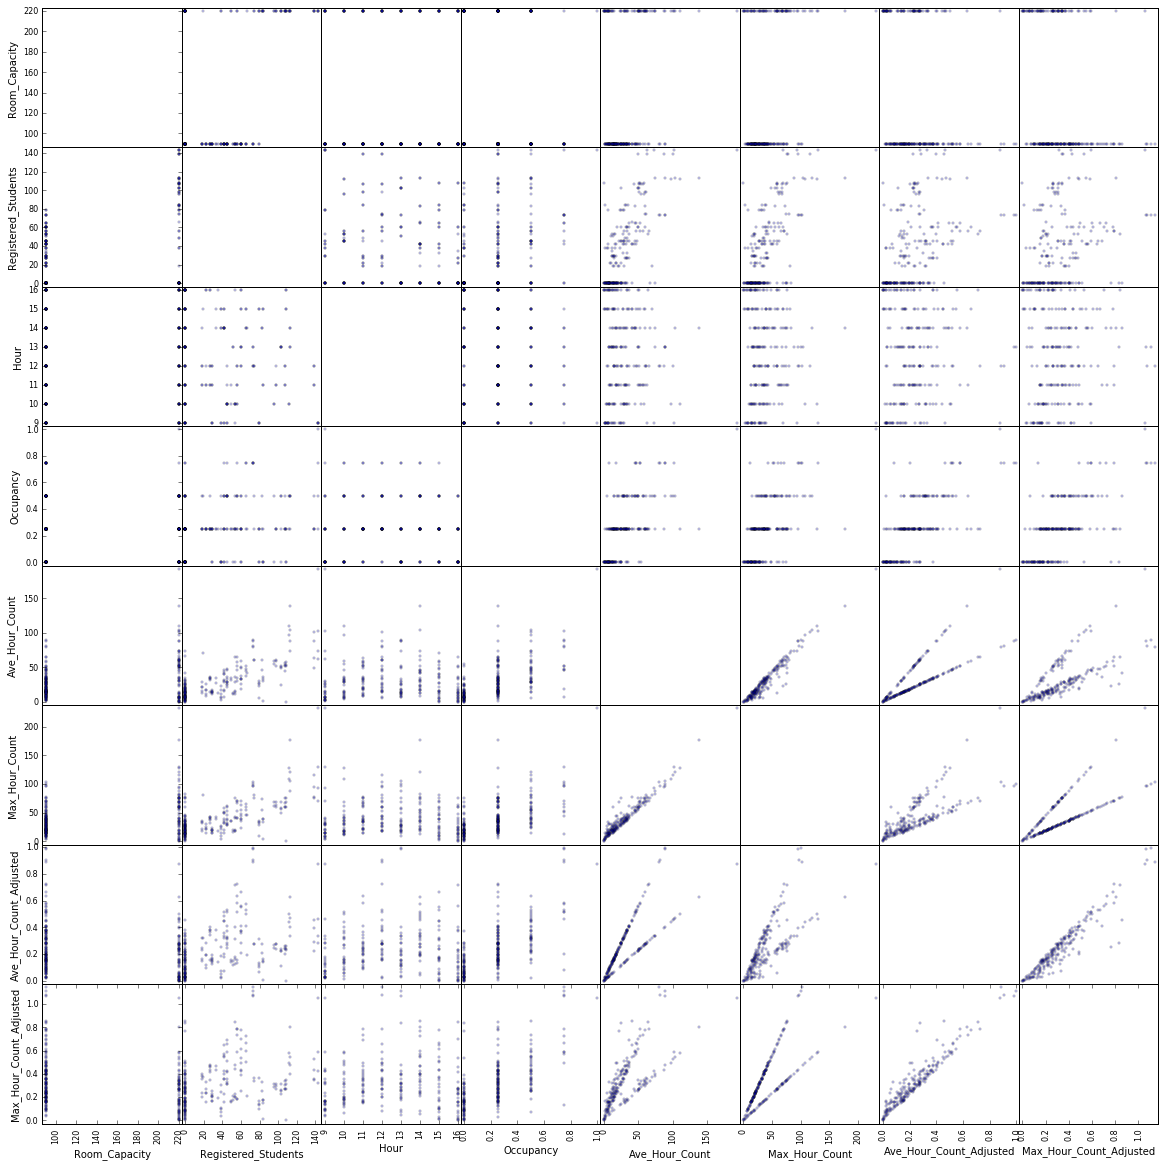

In [6]:
pd.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='corr')

                
                                        SKLearn Log Reg - 1
                                    
             'Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted'
             

In [7]:
ave1 = ['Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted']
max1 = ['Module', 'Registered_Students', 'Hour', 'Occupancy', 'Max_Hour_Count_Adjusted']

In [8]:
just_ave = ['Occupancy', 'Ave_Hour_Count_Adjusted']
just_max = ['Occupancy', 'Max_Hour_Count_Adjusted']

In [9]:
room_ave = ['Occupancy', 'Ave_Hour_Count_Adjusted', 'Room_Capacity']

In [10]:
module_ave = ['Occupancy', 'Ave_Hour_Count_Adjusted', 'Module']

In [11]:
room_name_ave = ['Occupancy', 'Ave_Hour_Count_Adjusted', 'Room']

In [12]:
hour_name_ave = ['Occupancy', 'Ave_Hour_Count_Adjusted', 'Hour']

                        FIRST WAVE

In [13]:
ave_Adj_Five_Model = df[ave1]

max_Adj_Five_Model = df[max1]

ave_Adj_Three_Model = df[ave1]

max_Adj_Three_Model = df[max1]

ave_Adj_Bin_Model = df[ave1]

max_Adj_Bin_Model = df[max1]

                        SECOND WAVE

In [14]:
min_five_model = df[just_ave]
min_three_model = df[just_ave]
min_two_model = df[just_ave]

                        THIRD WAVE

In [15]:
room_ave_five = df[room_ave]
room_ave_three = df[room_ave]
room_ave_two = df[room_ave]


                four wave
                

In [16]:
mod_ave_five = df[module_ave]
mod_ave_three = df[module_ave]
mod_ave_two = df[module_ave]

    
                    FIVE WAVE
        

In [17]:
room_name_ave_five = df[room_name_ave]
room_name_ave_three = df[room_name_ave]
room_name_ave_two = df[room_name_ave]

                    
                        SIX WAVE
                        

In [18]:
hour_ave_five = df[hour_name_ave]
hour_ave_three = df[hour_name_ave]
hour_ave_two = df[hour_name_ave]

In [19]:
occupants = df.groupby('Occupancy')

In [20]:
occupants.count()

,ID,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Ave_Hour_Count,Max_Hour_Count,Ave_Hour_Count_Adjusted,Max_Hour_Count_Adjusted
Occupancy,,,,,,,,,,,
0.00,67,67,67,67,67,67,67,67,67,67,67
0.25,96,96,96,96,96,96,96,96,96,96,96
0.50,40,40,40,40,40,40,40,40,40,40,40
0.75,12,12,12,12,12,12,12,12,12,12,12
1.00,1,1,1,1,1,1,1,1,1,1,1


In [21]:
occupancy_five = {0.00: 'Empty', 0.25 : 'Low', 0.50 : 'Medium', 0.75: 'High', 1.00 : 'High'}

occupancy_three = {0.00: 'Empty', 0.25 : 'Medium', 0.50 : 'Medium', 0.75: 'High', 1.00 : 'High'}

occupancy_binary = {0.00: 'Empty', 0.25 : 'Occupied', 0.50 : 'Occupied', 0.75: 'Occupied', 1.00 : 'Occupied'}

In [22]:
ave_Adj_Five_Model['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
max_Adj_Five_Model['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
ave_Adj_Three_Model['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
max_Adj_Three_Model['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
ave_Adj_Bin_Model['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
max_Adj_Bin_Model['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
min_five_model['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
min_three_model['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
min_two_model['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
room_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
room_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
room_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
mod_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
mod_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
mod_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
room_name_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
room_name_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
room_name_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
hour_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
hour_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
hour_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

/home/mike/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


    
                            GRAPHING STUFF
                            

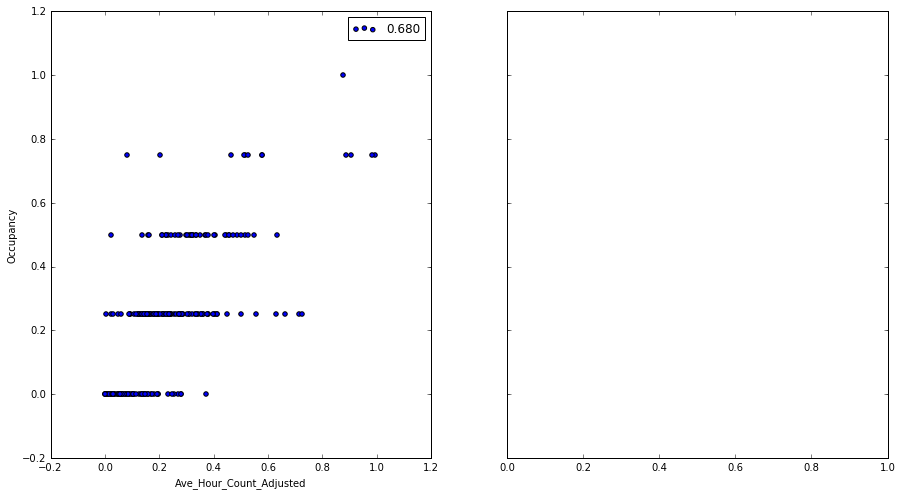

In [43]:
# scatterplots for all continuous features and the target feature total_score
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter',x='Ave_Hour_Count_Adjusted',  y='Occupancy',  label="%.3f" \
        % df[['Ave_Hour_Count_Adjusted','Occupancy' ]].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))

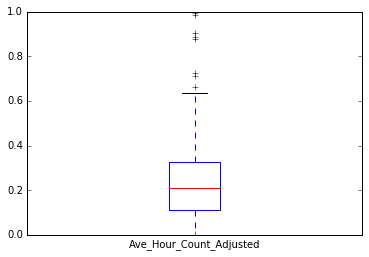

In [44]:
df['Ave_Hour_Count_Adjusted'].plot(kind='box')

In [45]:
df.head(20)

,ID,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Ave_Hour_Count,Max_Hour_Count,Ave_Hour_Count_Adjusted,Max_Hour_Count_Adjusted
0,92015-11-03B002,90,Vacant,0,9,2015-11-03,B002,0.00,4.750000,21,0.052778,0.233333
1,102015-11-03B002,90,COMP30110,45,10,2015-11-03,B002,0.50,29.272727,32,0.325253,0.355556
2,112015-11-03B002,90,COMP30260,18,11,2015-11-03,B002,0.50,28.727273,36,0.319192,0.400000
3,122015-11-03B002,90,COMP40370,27,12,2015-11-03,B002,0.50,14.166667,31,0.157407,0.344444
4,132015-11-03B002,90,Vacant,0,13,2015-11-03,B002,0.00,14.250000,29,0.158333,0.322222
5,142015-11-03B002,90,COMP30240,42,14,2015-11-03,B002,0.75,46.363636,51,0.515152,0.566667
6,152015-11-03B002,90,COMP30240,42,15,2015-11-03,B002,0.25,40.272727,58,0.447475,0.644444
7,162015-11-03B002,90,COMP40370,27,16,2015-11-03,B002,0.25,36.416667,41,0.404630,0.455556
8,92015-11-04B002,90,COMP30190,29,9,2015-11-04,B002,0.25,13.454545,15,0.149495,0.166667
9,102015-11-04B002,90,COMP40660,53,10,2015-11-04,B002,0.25,14.416667,18,0.160185,0.200000


                                                                             
                                                                             
                                                                                 SM Log Ave-5

In [46]:
# 4.1 - Train a logistic regression model to predict the target feature occupancy

logreg = sm.logit(formula="Occupancy ~ \
            Ave_Hour_Count_Adjusted", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.417574
         Iterations 6


In [47]:
logreg.summary()

Logit Regression Results 
 
 Dep. Variable: Occupancy No. Observations: 216 
 
 
 Model: Logit Df Residuals: 214 
 
 
 Method: MLE Df Model: 1 
 
 
 Date: Tue, 19 Jul 2016 Pseudo R-squ.: 0.1344 
 
 
 Time: 20:40:06 Log-Likelihood: -90.196 
 
 
 converged: True LL-Null: -104.20 
 
 
 LLR p-value: 1.209e-07 
 
 
 
 
 coef std err z P>|z| [95.0% Conf. Int.] 
 
 
 Intercept -2.2029 0.309 -7.120 0.000 -2.809 -1.597 
 
 
 Ave_Hour_Count_Adjusted 4.1095 0.920 4.467 0.000 2.307 5.912

    
                                    LINEAR STUFF
                                    

In [48]:
df.columns

Index(['ID', 'Room_Capacity', 'Module', 'Registered_Students', 'Hour', 'Date',
       'Room', 'Occupancy', 'Ave_Hour_Count', 'Max_Hour_Count',
       'Ave_Hour_Count_Adjusted', 'Max_Hour_Count_Adjusted'],
      dtype='object')

In [49]:
df['Ave_Count_Squared'] = df['Ave_Hour_Count_Adjusted']

In [50]:
df.columns.get_loc('Ave_Count_Squared')

12

In [51]:
for row in range(df.shape[0]):
    x = df.iat[row, 10]
    print(x**2)
    df.iat[row, 12] = x**2

0.00278549382716
0.105789205183
0.101883481277
0.0247770919067
0.0250694444444
0.265381083563
0.200233649628
0.163725137174
0.0223487399245
0.0256592935528
0.00863585348434
0.135930007142
0.0776757544582
0.0653086419753
0.00379655137231
0.0356790123457
0.00576474622771
0.139679624528
0.130401234568
0.0531558641975
0.0230589849108
0.125702479339
0.300466392318
0.139239540466
0.000721021947874
0.00340277777778
0.0378086419753
0.0244864540466
0.0146679012346
0.109879972565
0.144822530864
0.0531558641975
0.0267768595041
0.032600308642
0.0108244056729
0.0381695816187
0.129309254158
0.0208641975309
0.0283984910837
0.509637345679
0.000637690031629
0.0731001371742
0.0588511659808
0.142716049383
0.0161983471074
0.236058565453
0.200007716049
0.143416495199
0.0159422507907
0.0158573388203
0.0146923783287
0.16977451989
0.0436345679012
0.0332724622771
0.0956412894376
0.0776757544582
0.00417916539129
0.102637174211
0.117369684499
0.0274420977451
0.0079012345679
0.10086505487
0.438293038409
0.3107030

In [52]:
df.head(10)

,ID,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Ave_Hour_Count,Max_Hour_Count,Ave_Hour_Count_Adjusted,Max_Hour_Count_Adjusted,Ave_Count_Squared
0,92015-11-03B002,90,Vacant,0,9,2015-11-03,B002,0.00,4.750000,21,0.052778,0.233333,0.002785
1,102015-11-03B002,90,COMP30110,45,10,2015-11-03,B002,0.50,29.272727,32,0.325253,0.355556,0.105789
2,112015-11-03B002,90,COMP30260,18,11,2015-11-03,B002,0.50,28.727273,36,0.319192,0.400000,0.101883
3,122015-11-03B002,90,COMP40370,27,12,2015-11-03,B002,0.50,14.166667,31,0.157407,0.344444,0.024777
4,132015-11-03B002,90,Vacant,0,13,2015-11-03,B002,0.00,14.250000,29,0.158333,0.322222,0.025069
5,142015-11-03B002,90,COMP30240,42,14,2015-11-03,B002,0.75,46.363636,51,0.515152,0.566667,0.265381
6,152015-11-03B002,90,COMP30240,42,15,2015-11-03,B002,0.25,40.272727,58,0.447475,0.644444,0.200234
7,162015-11-03B002,90,COMP40370,27,16,2015-11-03,B002,0.25,36.416667,41,0.404630,0.455556,0.163725
8,92015-11-04B002,90,COMP30190,29,9,2015-11-04,B002,0.25,13.454545,15,0.149495,0.166667,0.022349
9,102015-11-04B002,90,COMP40660,53,10,2015-11-04,B002,0.25,14.416667,18,0.160185,0.200000,0.025659


In [125]:
lm = sm.ols(formula="Occupancy ~ Ave_Hour_Count_Adjusted", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     184.2
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           1.10e-30
Time:                        21:10:13   Log-Likelihood:                 89.766
No. Observations:                 216   AIC:                            -175.5
Df Residuals:                     214   BIC:                            -168.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 


                                            SKLearn Log Reg Prep
                                            

In [54]:
df.columns

Index(['ID', 'Room_Capacity', 'Module', 'Registered_Students', 'Hour', 'Date',
       'Room', 'Occupancy', 'Ave_Hour_Count', 'Max_Hour_Count',
       'Ave_Hour_Count_Adjusted', 'Max_Hour_Count_Adjusted',
       'Ave_Count_Squared'],
      dtype='object')

In [55]:
# Set your dummies as necessary

date_dummies = pd.get_dummies(df.Date, prefix='Date')
module_dummies = pd.get_dummies(df.Module, prefix='Module')
room_dummies = pd.get_dummies(df.Room, prefix='Room')
hour_dummies = pd.get_dummies(df.Room, prefix='Hour')

In [56]:
ave_Adj_Five_Model.columns

Index(['Module', 'Registered_Students', 'Hour', 'Occupancy',
       'Ave_Hour_Count_Adjusted'],
      dtype='object')

In [103]:
def SKLogR(df):
    
    intercept = pd.DataFrame({'Intercept': np.ones(216)})
    df = pd.concat([intercept, df], axis=1)
    
    for i in df.columns:
        if i == 'Room':
            df = pd.concat([df, room_dummies], axis=1)
            del df['Room']
            
        if i == 'Date':
            df = pd.concat([df, date_dummies], axis=1)
            del df['Date']
        
        if i == 'Module':
            df = pd.concat([df, module_dummies], axis=1)
            del df['Module']
            
        if i == 'Hour':
            df = pd.concat([df, hour_dummies], axis=1)
            del df['Hour']
            
            
    X = df.ix[:, df.columns != 'Occupancy']
    Y = df.Occupancy
    
    for i in X.columns:
        j = i.split('_')
    
        if j[0] in ['Date', 'Module', 'Room', 'Hour']:
            if i == 'Room_Capacity':
                continue

            X[i] = X[i].astype('category')
        
    logSK = LogisticRegression().fit(X, Y)
    logSK.score(X, Y)
    
    scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=12)
    print(scores.mean())


                                        SKLearn Log Reg - 1
                                    
             'Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            max_5
                                            max_3
                                            max_2

In [104]:
SKLogR(ave_Adj_Five_Model)

0.49386538241


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [105]:
SKLogR(max_Adj_Five_Model)

0.485532049077


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
SKLogR(ave_Adj_Three_Model)

0.667079463364


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [107]:
SKLogR(max_Adj_Three_Model)

0.649214539617


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [108]:
SKLogR(ave_Adj_Bin_Model)

0.76559454191


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
SKLogR(max_Adj_Bin_Model)

0.736971104231


/home/mike/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                                        SKLearn Log Reg - 2
                                    
                                     'Ave_Hour_Count_Adjusted'
             
                                            ave_5
                                            ave_3
                                            ave_2

In [110]:
SKLogR(min_five_model)

0.575861426442


In [111]:
SKLogR(min_three_model)

0.635182318541


In [112]:
SKLogR(min_two_model)

0.738820089439



                                        SKLearn Log Reg - 2
                                    
                                 'Ave_Hour_Count_Adjusted, 'Room'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [113]:
SKLogR(room_ave_five)

0.54459494324


In [114]:
SKLogR(room_ave_three)

0.654790161679


In [115]:
SKLogR(room_ave_two)

0.719728242174



                                        SKLearn Log Reg - 4
                                    
                                 'Ave_Hour_Count_Adjusted, 'Module'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                         MAYBE MODULE

In [127]:
pd.options.mode.chained_assignment = None

In [128]:
SKLogR(mod_ave_five)

0.514017887857


In [129]:
SKLogR(mod_ave_three)

0.695755933953


In [130]:
SKLogR(mod_ave_two)

0.770768833849



                                        
                                        SKLearn Log Reg - 5
                                    
                                 'Ave_Hour_Count_Adjusted, 'Room'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [131]:
SKLogR(room_name_ave_five)

0.511231510148


In [132]:
SKLogR(room_name_ave_three)

0.67769464511


In [133]:
SKLogR(room_name_ave_two)

0.719455911019



                                        
                                        SKLearn Log Reg - 6
                                    
                                 'Ave_Hour_Count_Adjusted, 'Hour'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [134]:
SKLogR(hour_ave_five)

0.511231510148


In [135]:
SKLogR(hour_ave_three)

0.67769464511


In [136]:
SKLogR(hour_ave_two)

0.719455911019
